In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from copy import deepcopy as dcp
import matplotlib.pyplot as plt
from program.metrics import PR_curve
from sklearn.feature_selection import RFE

# DataInput

In [2]:
set_name = ['','s','u','o']
train=[]
test=[]
for i in set_name:
    train.append((
                np.load(r'result/train_set/'+i+'xtrain.npy'),
                np.load(r'result/train_set/'+i+'ytrain.npy')
    ))
    test.append((
                np.load(r'result/test_set/'+i+'xtest.npy'),
                np.load(r'result/test_set/'+i+'ytest.npy')
    ))

In [3]:
for i in range(len(train)):
    print(train[i][0].shape)

(44436, 18)
(87680, 18)
(1192, 18)
(87680, 18)


# Load classifier

In [4]:
from program import classify
from program import metrics

## Choose 4 feature from 0~5

In [5]:
_0_6_four_index = []
index_list = np.array([i for i in range(train[0][0][:,0:6].shape[1])])
for j in range(len(set_name)):
    performance_four = []
    index = []
    for k in tqdm(classify.clf):
        rfe = RFE(estimator = k, n_features_to_select = 4, step = 1)
        temp = metrics.performance_rfe(rfe,train[j][0][:,0:6],train[j][1],test[j][0][:,0:6],test[j][1])
        performance_four.append(temp[1:])
        index.append(index_list[temp[0]])
    _0_6_four_index.append(dcp(index))
#     np.save(r'result/compare_old_paper/performance/'+set_name[j]+'_0_6_performance.npy',performance_four)
#     np.save(r'result/compare_old_paper/index/_0_6_four_index.npy',_0_6_four_index)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:15<00:00, 33.79s/it]


## Choose 4 from 7~13

In [6]:
_7_14_four_index = []
index_list = np.array([i for i in range(train[0][0][:,7:14].shape[1])])
for j in range(len(set_name)):
    performance_four = []
    index = []
    for k in tqdm(classify.clf):
        rfe = RFE(estimator = k, n_features_to_select = 4, step = 1)
        temp = metrics.performance_rfe(rfe,train[j][0][:,7:14],train[j][1],test[j][0][:,7:14],test[j][1])
        performance_four.append(temp[1:])
        index.append(index_list[temp[0]])
    _7_14_four_index.append(dcp(index))
#     np.save(r'result/compare_old_paper/performance/'+set_name[j]+'_7_14_performance.npy',performance_four)
#     np.save(r'result/compare_old_paper/index/_7_14_four_index.npy',_7_14_four_index)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:25<00:00, 36.40s/it]


# Draw

In [7]:
set_name = ['','s','u','o']
title_size = 18
font_size = 16
SET = ['None','SMOTE','UnderSample','OverSample']
be_draw = ['_0_6','_7_14']
title_name = ['Uni','Double','Three','Four']
clf_name = ['DT','AdaBoost','XGBoost','GBoost']

In [8]:
def draw_set():
    plt.xlabel('Recall',size = font_size)
    plt.ylabel('Precision',size = font_size)

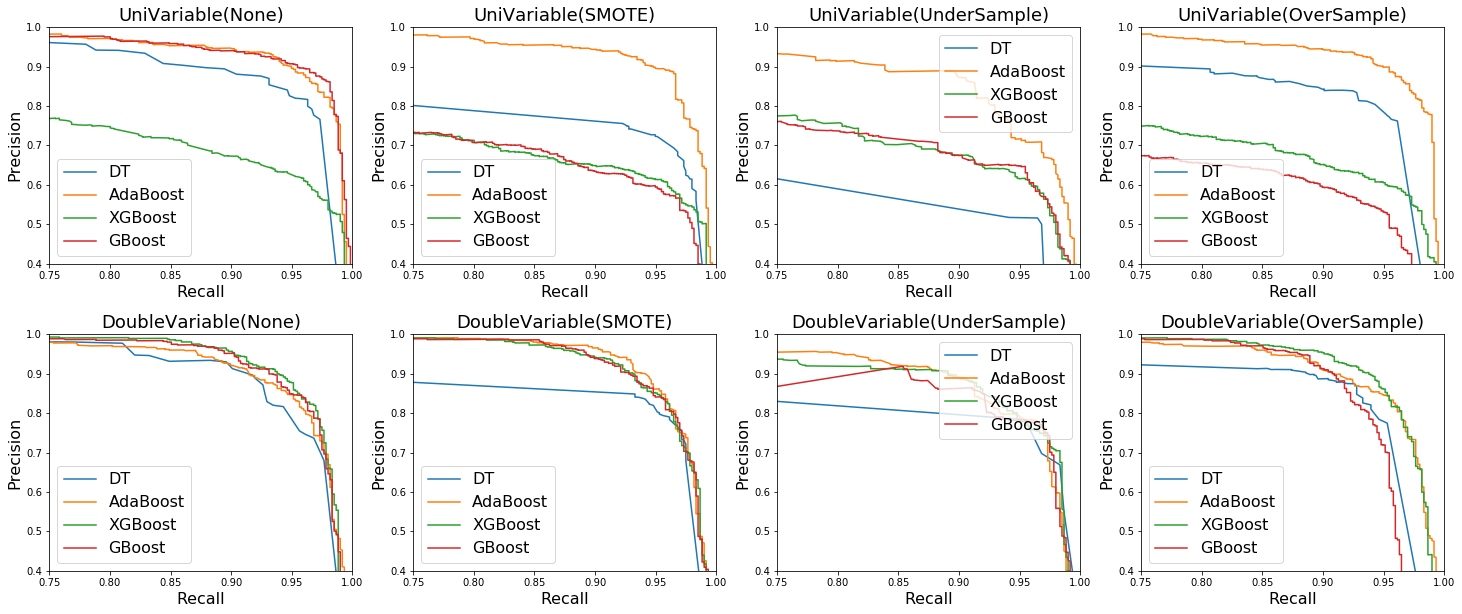

In [10]:
plt.figure(figsize = (25,10))
plt.subplots_adjust(hspace = 0.3)
for i in range(len(set_name)):
    for j in range(len(be_draw)):
        ytest = np.load(r'result/test_set/'+set_name[i]+'ytest.npy')
        performance = np.load(r'result/compare_old_paper/performance/'+set_name[i]+be_draw[j]+'_performance.npy',allow_pickle=True)
        plt.subplot(2,4,i+j*4+1)
        for k in range(len(clf_name)):
            recall,precision,area = PR_curve(ytest,performance[k][1])
            plt.plot(recall,precision ,label = clf_name[k])
    
        if (i==2):
            legend = plt.legend(fontsize = font_size,loc = 1)
        elif (i==1 and j==2):
            legend = plt.legend(fontsize = font_size,loc = 2)
        else:
            legend = plt.legend(fontsize = font_size,loc = 3)
        plt.title(title_name[j]+'Variable'+'('+SET[i]+')',size = title_size)
        draw_set()
#         frame = legend.get_frame()
#         frame.set_alpha(1)  
#         frame.set_facecolor('none')  #设置图例legend背景透明
        plt.xlim([0.75,1])
        plt.ylim([0.4,1])
# plt.savefig(r'result/compare_old_paper/figure/three_and_four.pdf')